In [13]:
import geopandas as gpd

# Load GeoJson files
gdf_apt = gpd.read_file("openaip/gb_airport.geojson", engine="fiona")
gdf_asp = gpd.read_file("openaip/gb_airspace.geojson", engine="fiona")
gdf_nav = gpd.read_file("openaip/gb_navaid.geojson", engine="fiona")
gdf_obs = gpd.read_file("openaip/gb_obstacle.geojson", engine="fiona")


In [14]:
print(f'airport = {list(gdf_apt.columns)}')
print(f'airspace = {list(gdf_asp.columns)}')
print(f'navaid = {list(gdf_nav.columns)}')
print(f'obstruction = {list(gdf_obs.columns)}')


airport = ['_id', 'name', 'icaoCode', 'type', 'magneticDeclination', 'country', 'elevation', 'ppr', 'private', 'skydiveActivity', 'winchOnly', 'frequencies', 'runways', 'createdAt', 'updatedAt', 'images', 'createdBy', 'updatedBy', 'elevationGeoid', 'services', 'iataCode', 'contact', 'hoursOfOperation', 'altIdentifier', 'remarks', 'telephoneServices', 'geometry']
airspace = ['_id', 'createdBy', 'createdAt', 'updatedBy', 'updatedAt', 'name', 'dataIngestion', 'type', 'icaoClass', 'activity', 'onDemand', 'onRequest', 'byNotam', 'specialAgreement', 'requestCompliance', 'country', 'upperLimit', 'lowerLimit', 'frequencies', 'hoursOfOperation', 'remarks', 'upperLimitMax', 'deletable', 'geometry']
navaid = ['_id', 'name', 'identifier', 'type', 'country', 'channel', 'frequency', 'elevation', 'magneticDeclination', 'alignedTrueNorth', 'createdAt', 'updatedAt', 'createdBy', 'updatedBy', 'elevationGeoid', 'range', 'hoursOfOperation', 'geometry']
obstruction = ['_id', 'osmId', 'country', 'createdAt'

In [15]:
display(gdf_obs.head())


,_id,osmId,country,createdAt,createdBy,elevation,elevationGeoid,height,name,osmImportJobId,osmTags,osmUpdatedAt,type,updatedAt,updatedBy,geometry
0,6888acbfbef823e53869254a,441794622,GB,2025-07-29T11:13:03.662000+00:00,openaip-system,"{'value': 13, 'unit': 0, 'referenceDatum': 1}","{'geoidHeight': 45, 'hae': 58}","{'value': 76, 'unit': 0, 'referenceDatum': 0}",Argo Apartments,ae79e590-352a-4750-90d1-42276b829d8b,"{'key': 'addr:city', 'value': 'London', 'addr:...",2025-08-01T17:00:17.469000+00:00,2,2025-08-01T17:00:17.469000+00:00,openaip-system,POINT (0.0091 51.51493)
1,6888acc0bef823e538692571,179864973,GB,2025-07-29T11:13:04.890000+00:00,openaip-system,"{'value': 12, 'unit': 0, 'referenceDatum': 1}","{'geoidHeight': 45, 'hae': 57}","{'value': 133, 'unit': 0, 'referenceDatum': 0}",Halo,ae79e590-352a-4750-90d1-42276b829d8b,"{'key': 'addr:city', 'value': 'London', 'addr:...",2025-08-01T17:00:30.233000+00:00,2,2025-08-01T17:00:30.233999+00:00,openaip-system,POINT (-0.00655 51.53504)
2,6888acd5bef823e53869282d,162017763,GB,2025-07-29T11:13:25.874001+00:00,openaip-system,"{'value': 65, 'unit': 0, 'referenceDatum': 1}","{'geoidHeight': 51, 'hae': 116}","{'value': 205, 'unit': 0, 'referenceDatum': 0}",Obstacle,ae79e590-352a-4750-90d1-42276b829d8b,"{'key': 'building', 'value': 'industrial', 'he...",2025-08-01T17:15:57.106998+00:00,1,2025-08-01T17:15:57.106998+00:00,openaip-system,POINT (-2.51336 52.6299)
3,6888acdebef823e53869299f,220594308,GB,2025-07-29T11:13:34.259998+00:00,openaip-system,"{'value': 17, 'unit': 0, 'referenceDatum': 1}","{'geoidHeight': 46, 'hae': 63}","{'value': 87, 'unit': 0, 'referenceDatum': 0}",Control Tower,ae79e590-352a-4750-90d1-42276b829d8b,"{'key': 'alt_name', 'value': 'The Patio Heater...",2025-08-01T06:03:31.017000+00:00,4,2025-08-01T06:03:31.017000+00:00,openaip-system,POINT (-0.46556 51.47182)
4,6888ad8fbef823e538693323,5079900013,GB,2025-07-29T11:16:31.582001+00:00,openaip-system,"{'value': 116, 'unit': 0, 'referenceDatum': 1}","{'geoidHeight': 53, 'hae': 169}",None,Obstacle,ae79e590-352a-4750-90d1-42276b829d8b,"{'key': 'generator:method', 'value': 'wind_tur...",2025-08-01T15:09:57.778000+00:00,0,2025-08-01T15:09:57.778000+00:00,openaip-system,POINT (-4.48148 50.35393)


<Axes: >

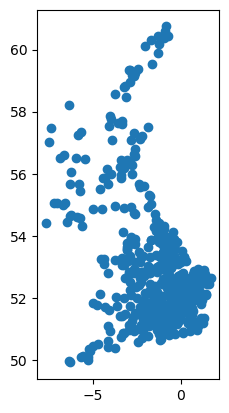

In [16]:
gdf_apt.plot()

### 1. Removing entries with missing coordinates

In [17]:
# Function to clean missing geometries
def remove_missing_geometry(gdf, name):
    gdf_clean = gdf[gdf.geometry.notnull() & gdf.is_valid]
    print(f"[{name}] Removed {len(gdf) - len(gdf_clean)} entries with missing/invalid coordinates")
    return gdf_clean

gdf_apt = remove_missing_geometry(gdf_apt, "Airports")
gdf_asp = remove_missing_geometry(gdf_asp, "Airspace")
gdf_nav = remove_missing_geometry(gdf_nav, "Navaids")
gdf_obs = remove_missing_geometry(gdf_obs, "Obstructions")


[Airports] Removed 0 entries with missing/invalid coordinates
[Airspace] Removed 0 entries with missing/invalid coordinates
[Navaids] Removed 0 entries with missing/invalid coordinates
[Obstructions] Removed 0 entries with missing/invalid coordinates


### 2. Flagging unrealistic altitudes

Based on research and aviation standards, here are the altitude thresholds that would be considered unrealistic for obstruction and airspace values.

**Obstruction:**
Elevation (AMSL): Realistic range: -400m (-1,312 ft) to 6,000m (19,685 ft) || Unrealistic: Above 8,848m (29,029 ft) - Mount Everest height

Height (AGL): Realistic range: 0.1m (0.3 ft) to 1,000m (3,281 ft) || Unrealistic: Above 1,500m (4,921 ft)

**Airspace Altitudes:**
Floor Altitude: Realistic range: -400m (-1,312 ft) to 18,000m (59,055 ft) || Unrealistic: Above 20,000m (65,617 ft)

Ceiling Altitude: Realistic range: 100m (328 ft) to 20,000m (65,617 ft) || Unrealistic: Above 25,000m (82,021 ft)

**Airport Elevations:**
Lower bound: Around -400m (-1,312 ft) - constrained by Dead Sea region ||

Upper bound: Around 4,400m (14,400 ft) - highest operational airports || unrealistic: Above 6,000m (19,685 ft)

**NAVAID Equipment Heights:**
Elevation (AMSL): Realistic range: -400m (-1,312 ft) to 6,000m (19,685 ft) || unrealistic: Above 8,000m (26,247 ft)

In [18]:
# Step 1: Extract numeric values
# The elevation/height values are in dictionaries. The numeric values need to be extracted first.
def extract_value(col):
    """Extract the 'value' from a dictionary in a column, return NaN if missing."""
    return col.apply(lambda x: x.get('value') if isinstance(x, dict) and 'value' in x else float('nan'))

# Airports
gdf_apt['elevation_val'] = extract_value(gdf_apt['elevation'])

# Airspace
gdf_asp['upperLimit_val'] = extract_value(gdf_asp['upperLimit'])
gdf_asp['lowerLimit_val'] = extract_value(gdf_asp['lowerLimit'])

# Navaids
gdf_nav['elevation_val'] = extract_value(gdf_nav['elevation'])

# Obstructions
gdf_obs['elevation_val'] = extract_value(gdf_obs['elevation'])
gdf_obs['height_val'] = extract_value(gdf_obs['height'])


In [19]:
# Airports
print("Airports – Extracted Elevation Values")
display(gdf_apt[['name', 'elevation', 'elevation_val']])

# Airspace
print("\nAirspace – Extracted Upper & Lower Limit Values")
display(gdf_asp[['name', 'upperLimit', 'upperLimit_val', 'lowerLimit', 'lowerLimit_val']])

# Navaids
print("\nNavaids – Extracted Elevation Values")
display(gdf_nav[['name', 'elevation', 'elevation_val']])

# Obstructions
print("\nObstructions – Extracted Elevation & Height Values")
display(gdf_obs[['name', 'elevation', 'elevation_val', 'height', 'height_val']])


Airports – Extracted Elevation Values


,name,elevation,elevation_val
0,ABERDEEN,"{'value': 66, 'unit': 0, 'referenceDatum': 1}",66
1,ABINGDON,"{'value': 79, 'unit': 0, 'referenceDatum': 1}",79
2,ALCONBURY,"{'value': 48, 'unit': 0, 'referenceDatum': 1}",48
3,ABOYNE,"{'value': 144, 'unit': 0, 'referenceDatum': 1}",144
4,ANDOVER,"{'value': 76, 'unit': 0, 'referenceDatum': 1}",76
...,...,...,...
462,BALADO,"{'value': 135, 'unit': 0, 'referenceDatum': 1}",135
463,KINGSMUIR,"{'value': 126, 'unit': 0, 'referenceDatum': 1}",126
464,CRANWELL NORTH,"{'value': 59, 'unit': 0, 'referenceDatum': 1}",59
465,EAST KIRKBY,"{'value': 14, 'unit': 0, 'referenceDatum': 1}",14



Airspace – Extracted Upper & Lower Limit Values


,name,upperLimit,upperLimit_val,lowerLimit,lowerLimit_val
0,BMFA BUCKMINSTER,"{'value': 2500, 'unit': 1, 'referenceDatum': 1}",2500,"{'value': 0, 'unit': 1, 'referenceDatum': 0}",0
1,ABERDEEN CTA 1,"{'value': 115, 'unit': 6, 'referenceDatum': 2}",115,"{'value': 1500, 'unit': 1, 'referenceDatum': 1}",1500
2,ABERDEEN CTA 2,"{'value': 115, 'unit': 6, 'referenceDatum': 2}",115,"{'value': 1500, 'unit': 1, 'referenceDatum': 1}",1500
3,ABERDEEN CTA 3,"{'value': 115, 'unit': 6, 'referenceDatum': 2}",115,"{'value': 3000, 'unit': 1, 'referenceDatum': 1}",3000
4,ARGYLL CTA 1,"{'value': 195, 'unit': 6, 'referenceDatum': 2}",195,"{'value': 5500, 'unit': 1, 'referenceDatum': 1}",5500
...,...,...,...,...,...
1046,MORAY CTA 2,"{'value': 195, 'unit': 6, 'referenceDatum': 2}",195,"{'value': 105, 'unit': 6, 'referenceDatum': 2}",105
1047,MORAY CTA 16,"{'value': 195, 'unit': 6, 'referenceDatum': 2}",195,"{'value': 45, 'unit': 6, 'referenceDatum': 2}",45
1048,MORAY CTA 5,"{'value': 195, 'unit': 6, 'referenceDatum': 2}",195,"{'value': 45, 'unit': 6, 'referenceDatum': 2}",45
1049,MORAY CTA 14,"{'value': 245, 'unit': 6, 'referenceDatum': 2}",245,"{'value': 195, 'unit': 6, 'referenceDatum': 2}",195



Navaids – Extracted Elevation Values


,name,elevation,elevation_val
0,ABERDEEN,"{'value': 82, 'unit': 0, 'referenceDatum': 1}",82
1,ABERDEEN,"{'value': 177, 'unit': 0, 'referenceDatum': 1}",177
2,BARKWAY,"{'value': 140, 'unit': 0, 'referenceDatum': 1}",140
3,BARRA,"{'value': 3, 'unit': 0, 'referenceDatum': 1}",3
4,BELFAST,"{'value': 60, 'unit': 0, 'referenceDatum': 1}",60
...,...,...,...
143,WOLVERHAMPTON,"{'value': 100, 'unit': 0, 'referenceDatum': 1}",100
144,WOODLEY,"{'value': 44, 'unit': 0, 'referenceDatum': 1}",44
145,YEOVIL,"{'value': 52, 'unit': 0, 'referenceDatum': 1}",52
146,YEOVIL,"{'value': 63, 'unit': 0, 'referenceDatum': 1}",63



Obstructions – Extracted Elevation & Height Values


,name,elevation,elevation_val,height,height_val
0,Argo Apartments,"{'value': 13, 'unit': 0, 'referenceDatum': 1}",13,"{'value': 76, 'unit': 0, 'referenceDatum': 0}",76.0
1,Halo,"{'value': 12, 'unit': 0, 'referenceDatum': 1}",12,"{'value': 133, 'unit': 0, 'referenceDatum': 0}",133.0
2,Obstacle,"{'value': 65, 'unit': 0, 'referenceDatum': 1}",65,"{'value': 205, 'unit': 0, 'referenceDatum': 0}",205.0
3,Control Tower,"{'value': 17, 'unit': 0, 'referenceDatum': 1}",17,"{'value': 87, 'unit': 0, 'referenceDatum': 0}",87.0
4,Obstacle,"{'value': 116, 'unit': 0, 'referenceDatum': 1}",116,None,NaN
...,...,...,...,...,...
7722,Obstacle,"{'value': 259, 'unit': 0, 'referenceDatum': 1}",259,None,NaN
7723,Obstacle,"{'value': 201, 'unit': 0, 'referenceDatum': 1}",201,None,NaN
7724,Obstacle,"{'value': 204, 'unit': 0, 'referenceDatum': 1}",204,None,NaN
7725,Obstacle,"{'value': 265, 'unit': 0, 'referenceDatum': 1}",265,None,NaN


In [20]:
import pandas as pd

# Step 2: Flagging unrealistic altitudes using the extracted values
# Airports (values in metres)
gdf_apt['altitude_flag'] = gdf_apt['elevation_val'].apply(lambda x: 'unrealistic' if pd.isna(x) or x < -400 or x > 6000 else 'ok')

# Airspace (values in ft)
gdf_asp['altitude_flag'] = gdf_asp.apply(
    lambda row: 'unrealistic' if pd.isna(row['lowerLimit_val']) or pd.isna(row['upperLimit_val'])
                or row['lowerLimit_val'] < -400 or row['upperLimit_val'] > 66000 else 'ok',
    axis=1
)

# Navaids (values in metres)
gdf_nav['altitude_flag'] = gdf_nav['elevation_val'].apply(lambda x: 'unrealistic' if pd.isna(x) or x < -400 or x > 8000 else 'ok')

# Obstructions (values in metres)
gdf_obs['altitude_flag'] = gdf_obs.apply(
    lambda row: ('ok' if (pd.notna(row['elevation_val']) and -400 <= row['elevation_val'] <= 10000 # Elevation must be valid (always required)
            # Height is optional: either missing or valid
            and (pd.isna(row['height_val']) or (-400 <= row['height_val'] <= 1500))
        )
        else 'unrealistic'),
    axis=1
)


In [21]:
# Show unrealistic rows for each dataset
flagged_airports = gdf_apt[gdf_apt['altitude_flag'] == 'unrealistic']
flagged_airspace = gdf_asp[gdf_asp['altitude_flag'] == 'unrealistic']
flagged_navaids = gdf_nav[gdf_nav['altitude_flag'] == 'unrealistic']
flagged_obstructions = gdf_obs[gdf_obs['altitude_flag'] == 'unrealistic']

# Display them
print("Airports – Unrealistic Altitudes")
display(flagged_airports)

print("\nAirspace – Unrealistic Altitudes")
display(flagged_airspace)

print("\nNavaids – Unrealistic Altitudes")
display(flagged_navaids)

print("\nObstructions – Unrealistic Altitudes")
display(flagged_obstructions)


Airports – Unrealistic Altitudes


,_id,name,icaoCode,type,magneticDeclination,country,elevation,ppr,private,skydiveActivity,...,services,iataCode,contact,hoursOfOperation,altIdentifier,remarks,telephoneServices,geometry,elevation_val,altitude_flag



Airspace – Unrealistic Altitudes


,_id,createdBy,createdAt,updatedBy,updatedAt,name,dataIngestion,type,icaoClass,activity,...,lowerLimit,frequencies,hoursOfOperation,remarks,upperLimitMax,deletable,geometry,upperLimit_val,lowerLimit_val,altitude_flag



Navaids – Unrealistic Altitudes


,_id,name,identifier,type,country,channel,frequency,elevation,magneticDeclination,alignedTrueNorth,createdAt,updatedAt,createdBy,updatedBy,elevationGeoid,range,hoursOfOperation,geometry,elevation_val,altitude_flag



Obstructions – Unrealistic Altitudes


,_id,osmId,country,createdAt,createdBy,elevation,elevationGeoid,height,name,osmImportJobId,osmTags,osmUpdatedAt,type,updatedAt,updatedBy,geometry,elevation_val,height_val,altitude_flag


### 3. Checking date fields for outdated info

In [10]:
from datetime import datetime

current_year = datetime.now().year

def flag_old_dates(gdf, date_columns, name, years_threshold=5):
    for col in date_columns:
        if col in gdf.columns:
            gdf[col] = pd.to_datetime(gdf[col], errors='coerce')
            flag_col = col + '_flag'
            gdf[flag_col] = gdf[col].apply(
                lambda x: 'outdated' if pd.notnull(x) and (current_year - x.year > years_threshold) else 'ok'
            )
            outdated_count = (gdf[flag_col] == 'outdated').sum()
            print(f"[{name}] {outdated_count} entries in '{col}' are outdated")
    return gdf

gdf_apt = flag_old_dates(gdf_apt, ['createdAt', 'updatedAt'], "Airports")
gdf_asp = flag_old_dates(gdf_asp, ['createdAt', 'updatedAt'], "Airspace")
gdf_nav = flag_old_dates(gdf_nav, ['createdAt', 'updatedAt'], "Navaids")
gdf_obs = flag_old_dates(gdf_obs, ['createdAt', 'updatedAt', 'osmUpdatedAt'], "Obstructions")


[Airports] 0 entries in 'createdAt' are outdated
[Airports] 0 entries in 'updatedAt' are outdated
[Airspace] 0 entries in 'createdAt' are outdated
[Airspace] 0 entries in 'updatedAt' are outdated
[Navaids] 0 entries in 'createdAt' are outdated
[Navaids] 0 entries in 'updatedAt' are outdated
[Obstructions] 0 entries in 'createdAt' are outdated
[Obstructions] 0 entries in 'updatedAt' are outdated
[Obstructions] 0 entries in 'osmUpdatedAt' are outdated


In [23]:
# Export GeoDataFrames to GeoJSON
gdf_apt.to_file("cleaned_airports.geojson", driver="GeoJSON")
gdf_asp.to_file("cleaned_airspace.geojson", driver="GeoJSON")
gdf_obs.to_file("cleaned_obstructions.geojson", driver="GeoJSON")
gdf_nav.to_file("cleaned_navaids.geojson", driver="GeoJSON")
